In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sn

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("../input/car-dataset/car_dataset.csv")

In [3]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


It might be arduous task to deal with 'Model' attribute as it has large number of unique values,So here I remove first model attribute

In [5]:
nw_data= data.drop(['Model'],axis=1)

In [6]:
nw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


it would be great to check null values frist 

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

As far as I know, we can remove data <5% of total data , so here we are safe remove data , otherwise we have to fill missing values with help of mean,median or mode.  

In [8]:
#removing null values
nmdata=data.dropna(axis=0)

## EDA

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

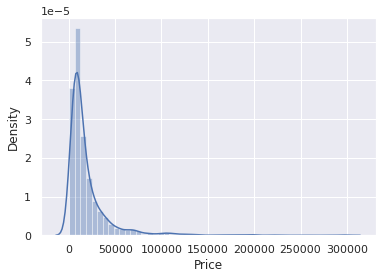

In [9]:
sns.distplot(data["Price"])

as it is clear that price attribute have outlier.Therefore I am removing top 1% outlier 

In [10]:
q=nmdata['Price'].quantile(.99)
data1=nmdata[nmdata["Price"]<q]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

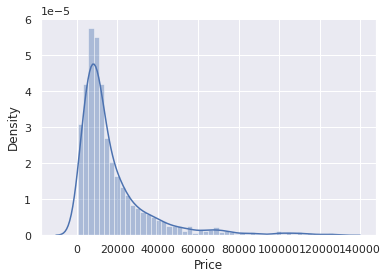

In [11]:
sns.distplot(data1['Price'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

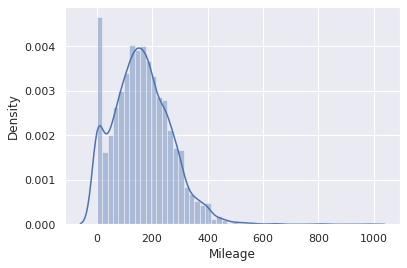

In [12]:
sns.distplot(nmdata['Mileage'])

In [13]:
q=nmdata['Mileage'].quantile(.99)
data2=data1[data1["Mileage"]<q]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

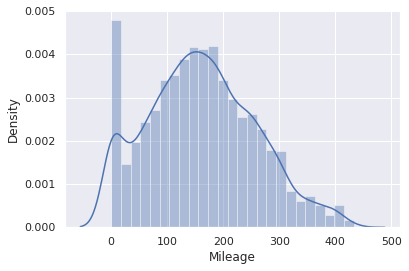

In [14]:
sns.distplot(data2['Mileage'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

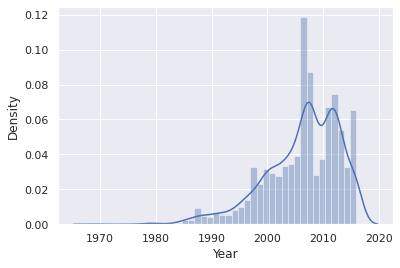

In [15]:
sns.distplot(nmdata['Year'])

In [16]:
q = nmdata['Year'].quantile(.01)
data3=data2[data2['Year']>q]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

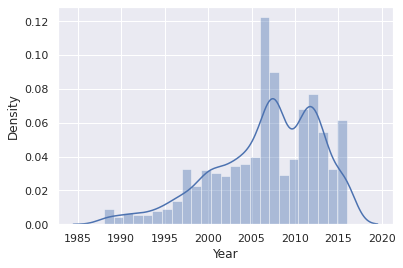

In [17]:
sns.distplot(data3['Year'])

In [18]:
data4=data3[data3['EngineV']<6.5]

Actually, natural value of engine is less than 6.5
#reference 
#https://en.wikipedia.org/wiki/Engine_displacement

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

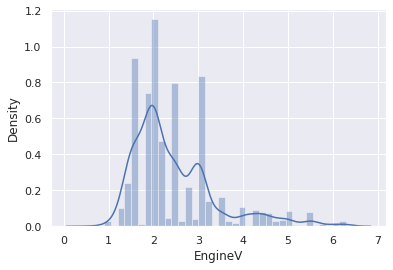

In [19]:
sns.distplot(data4["EngineV"])

we deleted number of rows, so now I need to reset index

In [20]:
mdata=data4.reset_index(drop=True)

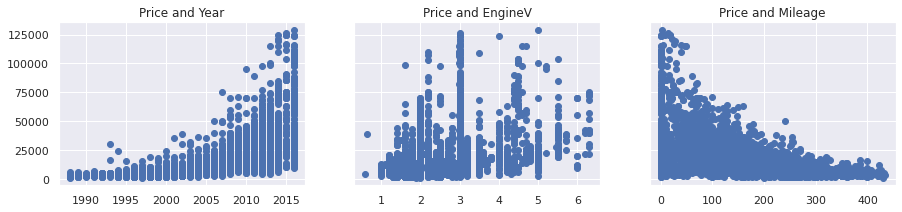

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

ax1.scatter(mdata['Year'],mdata['Price'])
ax1.set_title('Price and Year')

ax2.scatter(mdata['EngineV'],mdata['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(mdata['Mileage'],mdata['Price'])
ax3.set_title('Price and Mileage')


plt.show()

It's seems like non-linear pattern in all plots , because price attribute is not normally distributed as seen above figure of price distribution.

# Numpy use

In [22]:

log_price= np.log(mdata["Price"])
mdata['log price'] = log_price


To convert prices into normally distribution, here I am using a log transformation to deal with this issue

In [23]:
mdata.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log price
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,291,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN,181,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140,NaN,9.415868
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235,NaN,0.876669
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN,9.985068


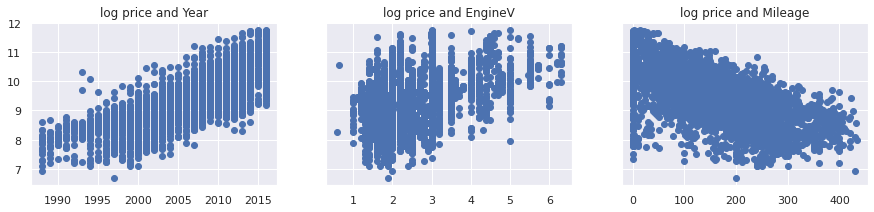

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

ax1.scatter(mdata['Year'],mdata['log price'])
ax1.set_title('log price and Year')

ax2.scatter(mdata['EngineV'],mdata['log price'])
ax2.set_title('log price and EngineV')

ax3.scatter(mdata['Mileage'],mdata['log price'])
ax3.set_title('log price and Mileage')


plt.show()

## Multicollinearity

In [25]:
mdata.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log price'], dtype=object)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = mdata[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [27]:
vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


VIF between 1 to 5 is significant or perfect valu


Here,year is too correlated with other features

In [28]:
gdata= mdata.drop(["Year"],axis=1)
gdata=gdata.drop(['Model'],axis=1)
gdata=gdata.drop(['Price'],axis=1)

gdata.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


### Create dummy variable 

In [29]:
dmdata=pd.get_dummies(gdata,drop_first=True)

In [30]:
dmdata.head()

,Mileage,EngineV,log price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rearrange a bit

In [31]:
dmdata.columns.values

array(['Mileage', 'EngineV', 'log price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [32]:
cols = ['log price', 'Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [33]:
data_processed = dmdata[cols] 
data_processed.head()

,log price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### Create a dependent and independent variable

In [34]:
data_processed.to_csv("car.csv")

In [35]:
y=data_processed['log price']
x1= data_processed.drop(['log price'],axis=1)

## Scale the data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1)

StandardScaler()

In [37]:
x = scaler.transform(x1)

In [38]:
x1

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

##  Linear Regression model


In [40]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_hat = reg.predict(x_train)

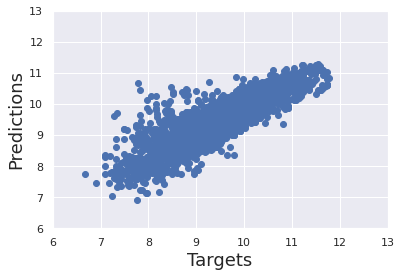

In [42]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

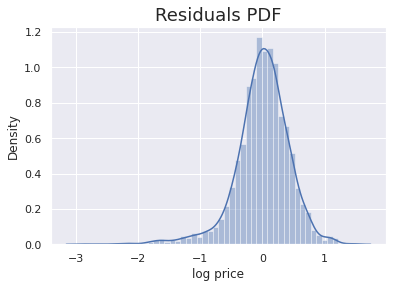

In [43]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [44]:
reg.score(x_train,y_train)

0.751677167856347

Here, 75% is accuracy of our model

In [45]:
#weight
reg.coef_

array([-0.45523524,  0.21101962,  0.01704649,  0.01208061, -0.13488127,
       -0.18085335, -0.05187398, -0.0861866 , -0.14687943, -0.10466162,
       -0.20448348, -0.12652425, -0.16778392, -0.12403195, -0.02833199,
       -0.14838772,  0.31543668])

In [46]:
fm = pd.DataFrame()
fm['feature']= x1.columns.values
fm['weight']=reg.coef_
fm

,feature,weight
0,Mileage,-0.455235
1,EngineV,0.211020
2,Brand_BMW,0.017046
3,Brand_Mercedes-Benz,0.012081
4,Brand_Mitsubishi,-0.134881
5,Brand_Renault,-0.180853
6,Brand_Toyota,-0.051874
7,Brand_Volkswagen,-0.086187
8,Body_hatch,-0.146879
9,Body_other,-0.104662


Positive weight means particular feature directly proportional to price.
i.e engine volume high, price will be high .


Negative weight means particular feature indirectly proportional to price.
i.e  mileage is less,then price would be decreased .

In [47]:
#bias
reg.intercept_

9.417300429660985

## Testing

In [48]:
y_hat_test= reg.predict(x_test)

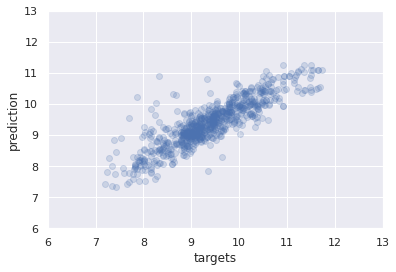

In [49]:
plt.scatter(y_test,y_hat_test,alpha=0.2)

plt.xlabel("targets")
plt.ylabel("prediction")

plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [50]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['prediction'])
df_pf

,prediction
0,11402.820060
1,21017.269912
2,12024.121789
3,5124.360310
4,7910.686464
...,...
769,18493.015825
770,3991.044869
771,7855.472017
772,12725.824781


In [51]:
df_pf['Target'] = np.exp(y_test)
df_pf


,prediction,Target
0,11402.820060,NaN
1,21017.269912,NaN
2,12024.121789,NaN
3,5124.360310,23000.0
4,7910.686464,18300.0
...,...,...
769,18493.015825,6950.0
770,3991.044869,NaN
771,7855.472017,8900.0
772,12725.824781,7500.0


In [52]:
y_test=y_test.reset_index(drop=True)

In [53]:
df_pf['Target'] = np.exp(y_test)
df_pf

,prediction,Target
0,11402.820060,12500.00
1,21017.269912,27000.00
2,12024.121789,8200.00
3,5124.360310,5300.00
4,7910.686464,8200.00
...,...,...
769,18493.015825,13300.95
770,3991.044869,2600.00
771,7855.472017,3500.00
772,12725.824781,7800.00


In [54]:
df_pf['dif']=df_pf['Target']-df_pf['prediction']
df_pf

,prediction,Target,dif
0,11402.820060,12500.00,1097.179940
1,21017.269912,27000.00,5982.730088
2,12024.121789,8200.00,-3824.121789
3,5124.360310,5300.00,175.639690
4,7910.686464,8200.00,289.313536
...,...,...,...
769,18493.015825,13300.95,-5192.065825
770,3991.044869,2600.00,-1391.044869
771,7855.472017,3500.00,-4355.472017
772,12725.824781,7800.00,-4925.824781


In [55]:
df_pf['Difference%'] = np.absolute(df_pf['dif']/df_pf['Target']*100)
df_pf

,prediction,Target,dif,Difference%
0,11402.820060,12500.00,1097.179940,8.777440
1,21017.269912,27000.00,5982.730088,22.158260
2,12024.121789,8200.00,-3824.121789,46.635632
3,5124.360310,5300.00,175.639690,3.313956
4,7910.686464,8200.00,289.313536,3.528214
...,...,...,...,...
769,18493.015825,13300.95,-5192.065825,39.035301
770,3991.044869,2600.00,-1391.044869,53.501726
771,7855.472017,3500.00,-4355.472017,124.442058
772,12725.824781,7800.00,-4925.824781,63.151600
